# Neural Network Assignment:

### Understanding of neural network is crucial for deep learning journey. So, in this assignment you need to implement a neural network from scratch, without TensorFlow or Keras with following components:

- Input Layer
- 1 Hidden Layer
- Output Layer
- Weights
- Biases
- Activation Function
- Sigmoid
- Forward Propagation
- Backward Propagation

In [1]:
# ---------------------
# NECESSARY LIBRARIES
# ---------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
# ============================================
# NEURAL NETWORK FROM SCRATCH
# ============================================

class NeuralNetwork:
    """
    A simple Neural Network with:
    - Input Layer
    - 1 Hidden Layer
    - Output Layer
    - Sigmoid Activation
    - Forward and Backward Propagation
    """

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        """
        Initialize the neural network

        Parameters:
        - input_size: Number of input features
        - hidden_size: Number of neurons in hidden layer
        - output_size: Number of output neurons
        - learning_rate: Learning rate for gradient descent
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases with random values
        # Weights between input and hidden layer
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.5
        self.b1 = np.zeros((1, self.hidden_size))

        # Weights between hidden and output layer
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.5
        self.b2 = np.zeros((1, self.output_size))

        # For storing intermediate values during forward propagation
        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None

        print("Neural Network Initialized!")
        print(f"Input Layer: {input_size} neurons")
        print(f"Hidden Layer: {hidden_size} neurons")
        print(f"Output Layer: {output_size} neurons")
        print(f"Learning Rate: {learning_rate}")

    # ----------------------------------------
    # ACTIVATION FUNCTIONS
    # ----------------------------------------

    def sigmoid(self, z):
        """
        Sigmoid activation function
        σ(z) = 1 / (1 + e^(-z))
        """
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip to prevent overflow

    def sigmoid_derivative(self, z):
        """
        Derivative of sigmoid function
        σ'(z) = σ(z) * (1 - σ(z))
        """
        sig = self.sigmoid(z)
        return sig * (1 - sig)

    # ----------------------------------------
    # FORWARD PROPAGATION
    # ----------------------------------------

    def forward_propagation(self, X):
        """
        Forward propagation through the network

        Steps:
        1. Input -> Hidden Layer
        2. Apply activation (Sigmoid)
        3. Hidden -> Output Layer
        4. Apply activation (Sigmoid)

        Parameters:
        - X: Input data (batch_size, input_size)

        Returns:
        - Output predictions (batch_size, output_size)
        """
        # Layer 1: Input -> Hidden
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Layer 2: Hidden -> Output
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    # ----------------------------------------
    # BACKWARD PROPAGATION
    # ----------------------------------------

    def backward_propagation(self, X, y):
        """
        Backward propagation (Backprop) to compute gradients

        Uses chain rule to compute gradients of loss w.r.t weights and biases

        Parameters:
        - X: Input data (batch_size, input_size)
        - y: True labels (batch_size, output_size)
        """
        m = X.shape[0]  # Number of samples

        # Compute error at output layer
        # dL/dz2 = (a2 - y) * sigmoid'(z2)
        dz2 = self.a2 - y

        # Gradients for W2 and b2
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)

        # Compute error at hidden layer
        # dL/dz1 = (dz2 * W2.T) * sigmoid'(z1)
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.z1)

        # Gradients for W1 and b1
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

        # Update weights and biases using gradient descent
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    # ----------------------------------------
    # LOSS FUNCTION
    # ----------------------------------------

    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy Loss
        L = -1/m * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
        """
        m = y_true.shape[0]
        epsilon = 1e-15  # Small value to prevent log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    # ----------------------------------------
    # TRAINING
    # ----------------------------------------

    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=1000, verbose=True):
        """
        Train the neural network

        Parameters:
        - X_train: Training data
        - y_train: Training labels
        - X_val: Validation data (optional)
        - y_val: Validation labels (optional)
        - epochs: Number of training epochs
        - verbose: Print progress
        """
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        print("\n" + "="*50)
        print("Starting Training...")
        print("="*50)

        for epoch in range(epochs):
            # Forward propagation
            predictions = self.forward_propagation(X_train)

            # Compute loss
            train_loss = self.compute_loss(y_train, predictions)
            train_losses.append(train_loss)

            # Backward propagation
            self.backward_propagation(X_train, y_train)

            # Compute accuracy
            train_acc = self.compute_accuracy(X_train, y_train)
            train_accuracies.append(train_acc)

            # Validation
            if X_val is not None and y_val is not None:
                val_pred = self.forward_propagation(X_val)
                val_loss = self.compute_loss(y_val, val_pred)
                val_losses.append(val_loss)
                val_acc = self.compute_accuracy(X_val, y_val)
                val_accuracies.append(val_acc)

            # Print progress
            if verbose and (epoch + 1) % 100 == 0:
                if X_val is not None:
                    print(f"Epoch {epoch+1}/{epochs} - "
                          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
                          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
                else:
                    print(f"Epoch {epoch+1}/{epochs} - "
                          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

        print("="*50)
        print("Training Complete!")
        print("="*50)

        return train_losses, val_losses, train_accuracies, val_accuracies

    # ----------------------------------------
    # PREDICTION
    # ----------------------------------------

    def predict(self, X):
        """
        Make predictions on new data

        Returns:
        - Binary predictions (0 or 1)
        """
        predictions = self.forward_propagation(X)
        return (predictions > 0.5).astype(int)

    def predict_proba(self, X):
        """
        Get probability predictions

        Returns:
        - Probabilities between 0 and 1
        """
        return self.forward_propagation(X)

    # ----------------------------------------
    # EVALUATION
    # ----------------------------------------

    def compute_accuracy(self, X, y):
        """
        Compute accuracy of predictions
        """
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

    def evaluate(self, X, y):
        """
        Evaluate the model and print metrics
        """
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        loss = self.compute_loss(y, self.predict_proba(X))

        print(f"\nEvaluation Results:")
        print(f"Loss: {loss:.4f}")
        print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

        return loss, accuracy

In [3]:
# ============================================
# EXAMPLE: TRAIN ON SYNTHETIC DATA
# ============================================

print("\n" + "="*60)
print("NEURAL NETWORK FROM SCRATCH - DEMONSTRATION")
print("="*60)

# Generate synthetic binary classification dataset
print("\nGenerating synthetic dataset...")
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Reshape y to column vector
y = y.reshape(-1, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")


NEURAL NETWORK FROM SCRATCH - DEMONSTRATION

Generating synthetic dataset...
Training samples: 800
Test samples: 200
Number of features: 20


In [4]:
# ============================================
# CREATE AND TRAIN NEURAL NETWORK
# ============================================

# Initialize neural network
nn = NeuralNetwork(
    input_size=20,      # 20 input features
    hidden_size=10,     # 10 neurons in hidden layer
    output_size=1,      # 1 output (binary classification)
    learning_rate=0.1
)

# Train the network
train_losses, val_losses, train_accs, val_accs = nn.train(
    X_train, y_train,
    X_val=X_test, y_val=y_test,
    epochs=1000,
    verbose=True
)

# ============================================
# EVALUATE THE MODEL
# ============================================

print("\n" + "="*50)
print("Final Evaluation on Test Set")
print("="*50)
nn.evaluate(X_test, y_test)

Neural Network Initialized!
Input Layer: 20 neurons
Hidden Layer: 10 neurons
Output Layer: 1 neurons
Learning Rate: 0.1

Starting Training...
Epoch 100/1000 - Train Loss: 0.5866, Train Acc: 0.7050 | Val Loss: 0.5932, Val Acc: 0.7050
Epoch 200/1000 - Train Loss: 0.4859, Train Acc: 0.7987 | Val Loss: 0.5021, Val Acc: 0.7550
Epoch 300/1000 - Train Loss: 0.4185, Train Acc: 0.8225 | Val Loss: 0.4317, Val Acc: 0.8050
Epoch 400/1000 - Train Loss: 0.3842, Train Acc: 0.8275 | Val Loss: 0.3936, Val Acc: 0.8200
Epoch 500/1000 - Train Loss: 0.3618, Train Acc: 0.8400 | Val Loss: 0.3738, Val Acc: 0.8150
Epoch 600/1000 - Train Loss: 0.3454, Train Acc: 0.8512 | Val Loss: 0.3611, Val Acc: 0.8200
Epoch 700/1000 - Train Loss: 0.3327, Train Acc: 0.8562 | Val Loss: 0.3533, Val Acc: 0.8150
Epoch 800/1000 - Train Loss: 0.3225, Train Acc: 0.8625 | Val Loss: 0.3478, Val Acc: 0.8250
Epoch 900/1000 - Train Loss: 0.3139, Train Acc: 0.8700 | Val Loss: 0.3432, Val Acc: 0.8300
Epoch 1000/1000 - Train Loss: 0.3060, T

(np.float64(0.3386785509151751), np.float64(0.835))

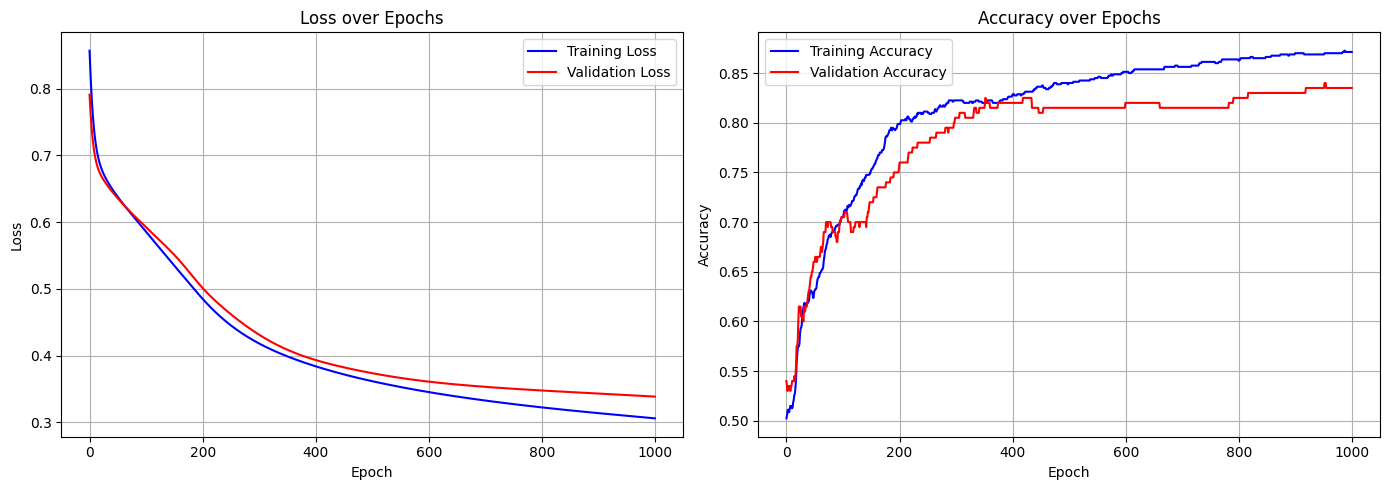

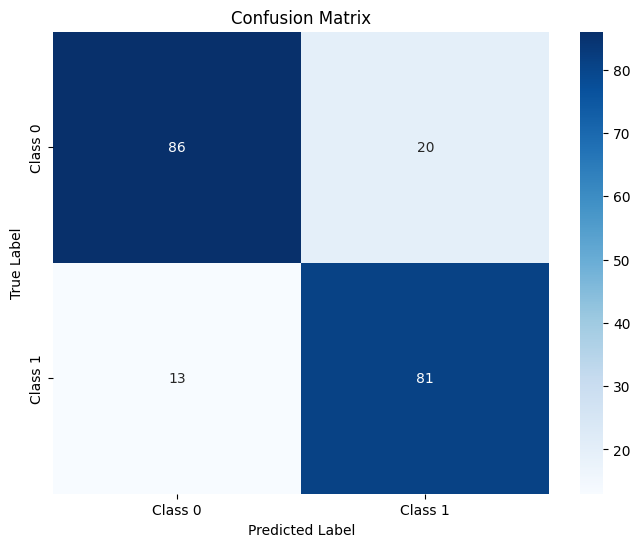

In [5]:
# ============================================
# VISUALIZE RESULTS
# ============================================

# Plot 1: Training and Validation Loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(train_losses, label='Training Loss', color='blue')
axes[0].plot(val_losses, label='Validation Loss', color='red')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss over Epochs')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Training and Validation Accuracy
axes[1].plot(train_accs, label='Training Accuracy', color='blue')
axes[1].plot(val_accs, label='Validation Accuracy', color='red')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy over Epochs')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Plot Confusion Matrix
y_pred = nn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [6]:
# ============================================
# DEMONSTRATE INDIVIDUAL COMPONENTS
# ============================================

print("\n" + "="*60)
print("DEMONSTRATING NEURAL NETWORK COMPONENTS")
print("="*60)

# Show network architecture
print("\n1. NETWORK ARCHITECTURE:")
print(f"   Input Layer:  {nn.input_size} neurons")
print(f"   Hidden Layer: {nn.hidden_size} neurons (Sigmoid activation)")
print(f"   Output Layer: {nn.output_size} neuron (Sigmoid activation)")

# Show weights and biases
print("\n2. WEIGHTS AND BIASES:")
print(f"   W1 shape (Input->Hidden): {nn.W1.shape}")
print(f"   b1 shape (Hidden bias):   {nn.b1.shape}")
print(f"   W2 shape (Hidden->Output): {nn.W2.shape}")
print(f"   b2 shape (Output bias):   {nn.b2.shape}")

# Show forward propagation example
print("\n3. FORWARD PROPAGATION EXAMPLE:")
sample = X_test[0:1]
print(f"   Input shape: {sample.shape}")
output = nn.forward_propagation(sample)
print(f"   Hidden layer output shape: {nn.a1.shape}")
print(f"   Final output shape: {output.shape}")
print(f"   Prediction probability: {output[0][0]:.4f}")
print(f"   Predicted class: {(output > 0.5).astype(int)[0][0]}")
print(f"   True class: {y_test[0][0]}")

print("\n4. BACKWARD PROPAGATION:")
print("   ✓ Gradients computed using chain rule")
print("   ✓ Weights updated using gradient descent")
print("   ✓ Learning rate: {:.4f}".format(nn.learning_rate))

print("\n" + "="*60)
print("NEURAL NETWORK IMPLEMENTATION COMPLETE!")
print("="*60)


DEMONSTRATING NEURAL NETWORK COMPONENTS

1. NETWORK ARCHITECTURE:
   Input Layer:  20 neurons
   Hidden Layer: 10 neurons (Sigmoid activation)
   Output Layer: 1 neuron (Sigmoid activation)

2. WEIGHTS AND BIASES:
   W1 shape (Input->Hidden): (20, 10)
   b1 shape (Hidden bias):   (1, 10)
   W2 shape (Hidden->Output): (10, 1)
   b2 shape (Output bias):   (1, 1)

3. FORWARD PROPAGATION EXAMPLE:
   Input shape: (1, 20)
   Hidden layer output shape: (1, 10)
   Final output shape: (1, 1)
   Prediction probability: 0.0615
   Predicted class: 0
   True class: 0

4. BACKWARD PROPAGATION:
   ✓ Gradients computed using chain rule
   ✓ Weights updated using gradient descent
   ✓ Learning rate: 0.1000

NEURAL NETWORK IMPLEMENTATION COMPLETE!
